## import statements

In [52]:
%matplotlib widget

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sp
import math as math

In [54]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## define some helpful functions

In [55]:
def factorial(x):
    return sp.factorial(x, exact=True)

def multiplicity(N,q):
    return factorial(q+N-1)//factorial(q)//factorial(N-1)

def logArray(array):
    import math as math
    return [math.log(x) for x in array]

## Two Einstein Solids
### 3 particles each and 6 energy units

In [56]:
table1 = pd.DataFrame({'q_A':range(0, 6+1, 1),'q_B':range(6,0-1,-1)})
table1['multi_A'] = [multiplicity(3,i) for i in table1['q_A']]
table1['multi_B'] = [multiplicity(3,i) for i in table1['q_B']]
table1['multi_total'] = table1['multi_A']*table1['multi_B']

table1

,q_A,q_B,multi_A,multi_B,multi_total
0,0,6,1,28,28
1,1,5,3,21,63
2,2,4,6,15,90
3,3,3,10,10,100
4,4,2,15,6,90
5,5,1,21,3,63
6,6,0,28,1,28


#### how many total microstates from the above situation?

First just add up the microstate from each macrostate

In [57]:
table1['multi_total'].sum()

462

Alternatively, treat the two Einstein solids as one solid with the combined number of particles

In [58]:
multiplicity(6,6)

462

#### most likely macrostate
just sort the table for the macrostate with the highest total multiplicity.

In [59]:
table1.sort_values('multi_total', ascending=False).iloc[0]

q_A              3
q_B              3
multi_A         10
multi_B         10
multi_total    100
Name: 3, dtype: int64

In [60]:
table1['probability'] = table1['multi_total']/table1['multi_total'].sum()

In [61]:
table1

,q_A,q_B,multi_A,multi_B,multi_total,probability
0,0,6,1,28,28,0.060606
1,1,5,3,21,63,0.136364
2,2,4,6,15,90,0.194805
3,3,3,10,10,100,0.216450
4,4,2,15,6,90,0.194805
5,5,1,21,3,63,0.136364
6,6,0,28,1,28,0.060606


<BarContainer object of 7 artists>

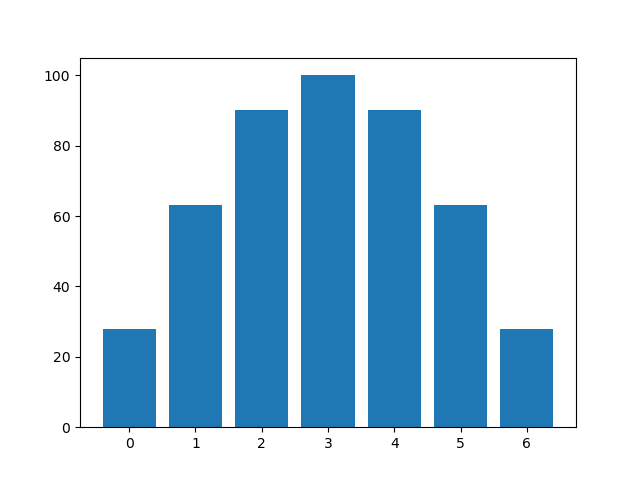

In [62]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()

ax1.bar(table1['q_A'],table1['multi_total'])

In [63]:
def multiTable(N_a, N_b, q):
    df = pd.DataFrame({'q_A':range(0, q+1, 1),'q_B':range(q, 0-1,-1)})
    df['multi_A'] = [multiplicity(N_a, i) for i in df['q_A']]
    df['multi_B'] = [multiplicity(N_b, i) for i in df['q_B']]
    df['multi_total'] = df['multi_A']*df['multi_B']
    df['probability'] = df['multi_total']/df['multi_total'].sum()
    return df


def multiLargeN(N_a, N_b, q):
    q_A = np.arange(0, q+1, 1)
    q_B = np.arange(q, 0-1, -1)
    multi_A = np.array([multiplicity(N_a, i) for i in q_A])
    multi_B = np.array([multiplicity(N_b, i) for i in q_B])
    multi_total = multi_A*multi_B
    probability = multi_total/multi_total.sum()
    return q_A, probability

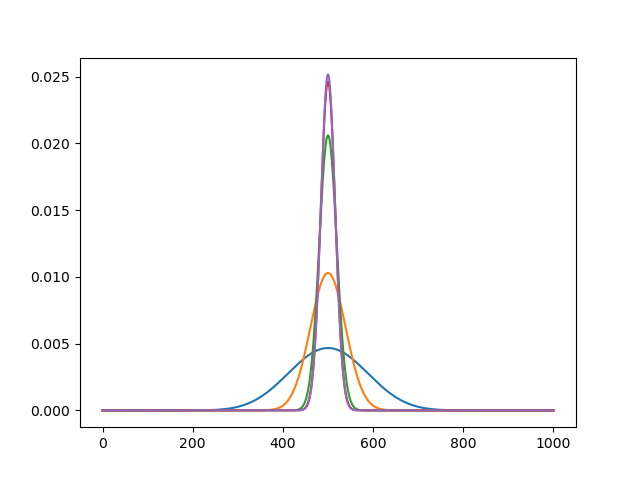

In [64]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)

for i in [18, 100, 1000, 10000, 100000]:
    q_A, probability = multiLargeN(i,i,1000)
    ax0.plot(q_A, probability)



In [65]:
fig0.savefig('multiplitcitySharpness-1.png', dpi=300)

In [66]:
ax0.set_xlim(300,500)
ax0.set_ylim(0,0.005)

(0.0, 0.005)

In [67]:
fig0.savefig('multiplitcitySharpness-2.png', dpi=300)

In [68]:
def multiplicityApprox(N,q):
    return (((q+N)/q)**q)*(((q+N)/N)**N)/np.sqrt(2*np.pi*q*(q+N)/N)

def multiEvenLargerN(N_a, N_b, q):
    q_A = np.arange(1, q+1, 1)
    q_B = np.arange(q, 1-1, -1)
    multi_A = np.array([multiplicityApprox(N_a, i) for i in q_A], dtype=np.float64)
    multi_B = np.array([multiplicityApprox(N_b, i) for i in q_B], dtype=np.float64)
    multi_total = multi_A*multi_B
    probability = multi_total/multi_total.sum()
    return q_A, probability

## got this from chatgpt

In [71]:
from mpmath import mp

# mp.dps = 50  # set decimal places of precision

def multiplicityApprox_mp(N, q):
    N = mp.mpf(N)
    q = mp.mpf(q)
    return (((q + N) / q) ** q) * (((q + N) / N) ** N) / mp.sqrt(2 * mp.pi * q * (q + N) / N)

def multiEvenLargerN_mp(N_a, N_b, q):
    q_A = [mp.mpf(i) for i in range(1, q + 1)]
    q_B = [mp.mpf(i) for i in range(q, 0, -1)]
    
    multi_A = [multiplicityApprox_mp(N_a, i) for i in q_A]
    multi_B = [multiplicityApprox_mp(N_b, i) for i in q_B]
    
    multi_total = [a * b for a, b in zip(multi_A, multi_B)]
    total_sum = sum(multi_total)
    probability = [m / total_sum for m in multi_total]
    
    # convert to float for plotting
    probability_float = [float(p) for p in probability]
    
    return [float(i) for i in q_A], probability_float

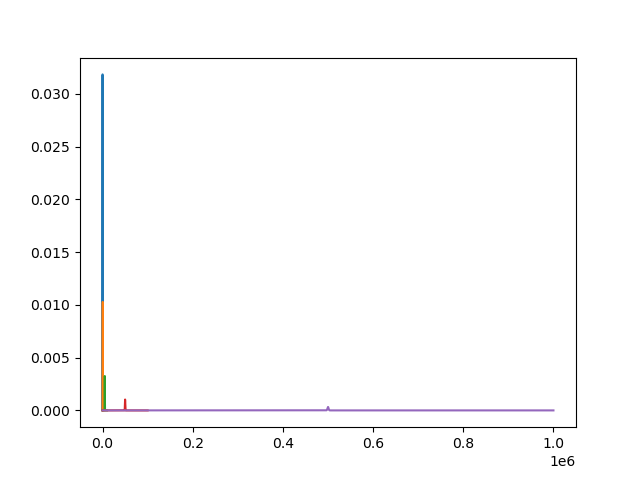

In [72]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i in [10, 100, 1000, 10000, 100000]:
    q_A, probability = multiEvenLargerN_mp(i,i,10*i)
    ax2.plot(q_A, probability)


In [48]:
fig2.savefig('multiplicity-fig2.png', dpi=300)

Make these numbers floats instead of integers so we can read them better. Note that this will break for numbers much larger than this.

In [13]:
table2 = multiTable(300, 200, 100)

In [14]:
table2

,q_A,q_B,multi_A,multi_B,multi_total,probability
0,0,100,1,2772167642172376496522255684217603720186977337162432472442022438203170885549339080,2772167642172376496522255684217603720186977337162432472442022438203170885549339080,2.99313e-35
1,1,99,300,927146368619523911880353071644683518457183055907168050983953992710090597173692000,278143910585857173564105921493405055537154916772150415295186197813027179152107600000,3.00314e-33
2,2,98,45150,308011713064875393544144141251086135326379605821508849152387400262748218524146000,13906728844879124018518107977486539009986039202841124539230291121863082066365191900000,1.50152e-31
3,3,97,4545100,101633494546659220765407831119887007616111789126289115208531869446967425640964000,461934396064020824300855133222998438315989692757896657534298199823411646280745476400000,4.98754e-30
4,4,96,344291325,33305570848060623021096485198071080198523120085304203294687808568769730699910500,11466819117160165580258811841686779645730788057303497180397431073488084202565363426412500,1.23808e-28
5,5,95,20932912560,10838423055640067152628008742423131183248201790471876326406880076616590329462400,226879762112001540538490281212058967580343944857183228279809239626221186011978011007744000,2.44964e-27
6,6,94,1064089721800,3502211531584375440475036838538086606831901939098055275539638119995156739112000,3726667294328369975681834409364744096168064513739730181069995871978321351869083259041600000,4.02371e-26
7,7,93,46515922124400,1123576395798400311961274617141911744171326901963198620821590386619606598896000,52264192127772420273287315919535591995211217783134860520866582770153308320410683014662400000,5.64301e-25
8,8,92,1785048511523850,357851386333052154152049792445882850027169184529374903206876390258984293484000,638782084520560946585028320555933513294210393375977484045916868437777014493170124465593400000,6.89698e-24
9,9,91,61088326838816200,113135146194641918151163508264677739527489914009286910979493566679816340208000,6911236787695538366717587816446327618443965523750171053045093693796429737563370999181769600000,7.46212e-23


In [15]:
table2 = table2.astype(float)

In [16]:
table2

,q_A,q_B,multi_A,multi_B,multi_total,probability
0,0.0,100.0,1.000000e+00,2.772168e+81,2.772168e+81,2.993133e-35
1,1.0,99.0,3.000000e+02,9.271464e+80,2.781439e+83,3.003143e-33
2,2.0,98.0,4.515000e+04,3.080117e+80,1.390673e+85,1.501521e-31
3,3.0,97.0,4.545100e+06,1.016335e+80,4.619344e+86,4.987544e-30
4,4.0,96.0,3.442913e+08,3.330557e+79,1.146682e+88,1.238082e-28
5,5.0,95.0,2.093291e+10,1.083842e+79,2.268798e+89,2.449640e-27
6,6.0,94.0,1.064090e+12,3.502212e+78,3.726667e+90,4.023714e-26
7,7.0,93.0,4.651592e+13,1.123576e+78,5.226419e+91,5.643009e-25
8,8.0,92.0,1.785049e+15,3.578514e+77,6.387821e+92,6.896984e-24
9,9.0,91.0,6.108833e+16,1.131351e+77,6.911237e+93,7.462120e-23


Total multiplicity of all macrostates:

In [17]:
total = table2['multi_total'].sum()
total

9.261760158884879e+115

Total mulitplicity of all states as a combined Einstein solid.

In [18]:
float(multiplicity(500,100))

9.261760158884879e+115

Most probable macrostate

In [19]:
table2.sort_values('multi_total', ascending=False).iloc[0]

q_A             6.000000e+01
q_B             4.000000e+01
multi_A         1.303375e+69
multi_B         5.268097e+45
multi_total    6.866305e+114
probability     7.413607e-02
Name: 60, dtype: float64

Multiplicity of the most common macrostate:

In [20]:
multi_max = table2['multi_total'].sort_values(ascending=False).iloc[0]
multi_max

6.866305444480905e+114

In [21]:
table2[55:65]

,q_A,q_B,multi_A,multi_B,multi_total,probability
55,55.0,45.0,1.473125e+65,2.982131e+49,4.393050e+114,0.047432
56,56.0,44.0,9.338557e+65,5.499832e+48,5.136049e+114,0.055454
57,57.0,43.0,5.832502e+66,9.958543e+47,5.808323e+114,0.062713
58,58.0,42.0,3.590006e+67,1.769493e+47,6.352491e+114,0.068588
59,59.0,41.0,2.178343e+68,3.083764e+46,6.717494e+114,0.072529
60,60.0,40.0,1.303375e+69,5.268097e+45,6.866305e+114,0.074136
61,61.0,39.0,7.692049e+69,8.816899e+44,6.782001e+114,0.073226
62,62.0,38.0,4.478757e+70,1.444786e+44,6.470846e+114,0.069866
63,63.0,37.0,2.573508e+71,2.316534e+43,5.961620e+114,0.064368
64,64.0,36.0,1.459662e+72,3.631855e+42,5.301279e+114,0.057238


### Now to add in the Entropy

In [23]:
table2['S_a'] = logArray(table2['multi_A'])
table2['S_b'] = logArray(table2['multi_B'])
table2['S_total'] = logArray(table2['multi_total'])

In [24]:
table2

,q_A,q_B,multi_A,multi_B,multi_total,probability,S_a,S_b,S_total
0,0.0,100.0,1.000000e+00,2.772168e+81,2.772168e+81,2.993133e-35,0.000000,187.529022,187.529022
1,1.0,99.0,3.000000e+02,9.271464e+80,2.781439e+83,3.003143e-33,5.703782,186.433749,192.137531
2,2.0,98.0,4.515000e+04,3.080117e+80,1.390673e+85,1.501521e-31,10.717746,185.331775,196.049521
3,3.0,97.0,4.545100e+06,1.016335e+80,4.619344e+86,4.987544e-30,15.329560,184.223010,199.552571
4,4.0,96.0,3.442913e+08,3.330557e+79,1.146682e+88,1.238082e-28,19.656999,183.107362,202.764361
5,5.0,95.0,2.093291e+10,1.083842e+79,2.268798e+89,2.449640e-27,23.764589,181.984735,205.749323
6,6.0,94.0,1.064090e+12,3.502212e+78,3.726667e+90,4.023714e-26,27.693141,180.855032,208.548173
7,7.0,93.0,4.651592e+13,1.123576e+78,5.226419e+91,5.643009e-25,31.470816,179.718154,211.188970
8,8.0,92.0,1.785049e+15,3.578514e+77,6.387821e+92,6.896984e-24,35.118222,178.574000,213.692222
9,9.0,91.0,6.108833e+16,1.131351e+77,6.911237e+93,7.462120e-23,38.651097,177.422465,216.073562


#### Plotting Entropy

In [25]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.plot(table2['q_A'], table2['S_a'], label='S_a')
ax2.plot(table2['q_A'], table2['S_b'], label='S_b')
ax2.plot(table2['q_A'], table2['S_total'], label='S_total')

# labels
ax2.set_ylabel('Entropy')
ax2.set_xlabel('q_A')

#legend
ax2.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …